In [1]:
import torch

## Steps

* 1. **Data (prepare and load)**
* 2. **Build model**
* 3. **Fitting the model to train data**
* 4. **Making predictions and evaluting a model**
* 5. **Saving and loading a model**
* 6. **Putting it all together**

In [2]:
from torch import nn  #nn contains all of PyTorch's building blocks for neural networks

In [3]:
import matplotlib.pyplot as plt

In [4]:
torch.__version__

'2.0.1'

## Data (preparing and loading)

In [31]:
# Create known parameters

weight = 0.7
bias = 0.3

# Create 

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [13]:
len(X), len(Y)

(50, 50)

### Spliting data into training and testing sets 

In [18]:
# Create a train/test split

train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test , Y_test = X[train_split:],Y[train_split:]



len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [32]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### Plotting functions

In [34]:
def plot_predictions(train_data= X_train, train_labels=Y_train, test_data=X_test,
                    test_labels=Y_test, predictions=None):
    plt.figure(figsize=(10,7))
    
    # plot training data
    plt.scatter(train_data, train_labels, c='g', s=4, label='Training data')
    
    # plot test data
    plt.scatter(test_data, test_labels, c='b', s=4, label='Testing data')
    
    # Are there predcitions
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, labels='Predictions')
        
    plt.legend(prop={'size':14})

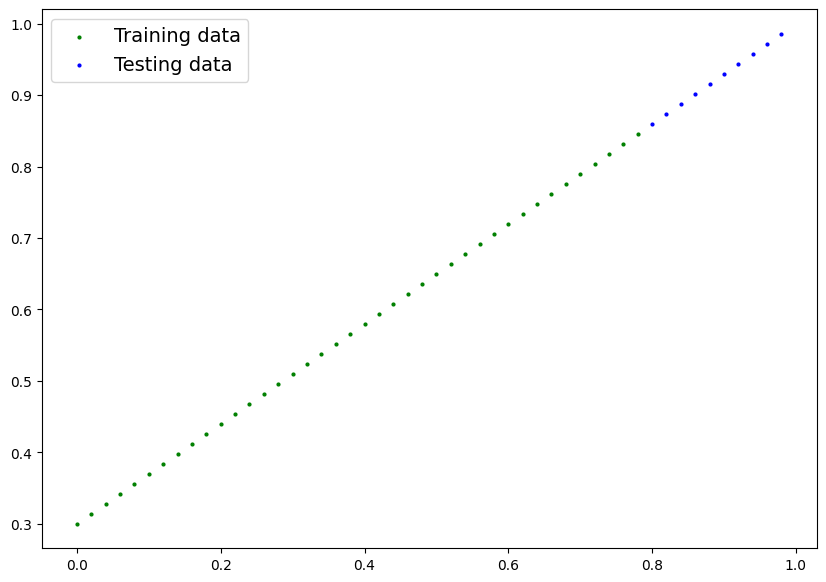

In [35]:
plot_predictions()

### Building model

**What our model does**:

* Start with random values (weight & bias)
* Look at training data and adjust the random values ot better represent (or ger closer to) the ideal values (the weight & bias values we used to create the data)


**How does it do so ?**

* Gradient desecent
* Backpropagation

In [84]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):   # almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,  # Start with a random weight and try to adjust it to ideal weight
                                               requires_grad=True, # This parameter updated via gradient descent
                                               dtype=torch.float)) # PyTorch loves the datatype torch.float32
        
        self.bias = nn.Parameter(torch.randn(1,     # Start with a random bias and try to adjust it to the ideal bias
                                            requires_grad=True, # Parameter updated via gradient descent
                                            dtype = torch.float)) # PyTorch loves the datatype torch.float32
        
    # Forward method to define the computation in the model
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:       # x is the input data
        return self.weights * X + self.bias  # this is the linear regression formula
            

### PyTorch model building essentials

* **torch.nn** - contains all of the building for computational graphs (a neural network can be)

* **torch.nn.Parameter** - what parameter should our model try and learn, often a pytorch layer **torch.nn** will set these for us.

* **torch.nn.Module** - The base class for all neural networks modules, if you subclass it, you should overwrite forward()

* **torch.optim** - this where the optimizers in pytorch they will help with gradient descent.

* **def forward()** - All nn.Module subclassees require you to overwrite forward(), this method defines what happens in the forward computation

## Checking the contents of our PyTorch model 

In [85]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

# Check out the paramers
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [86]:
# List named parameters 

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [87]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

In [92]:
# Make predictions

with torch.inference_mode():
    y_preds = model_0(X_test)
    
# you can also do something similar with torch.no_grad()

# with torch.no_grad():
#     y_preds = model_0(X_test)
    
y_preds

tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894],
        [0.1961],
        [0.2029],
        [0.2096],
        [0.2163],
        [0.2231],
        [0.2298],
        [0.2366],
        [0.2433],
        [0.2500],
        [0.2568],
        [0.2635],
        [0.2702],
        [0.2770],
        [0.2837],
        [0.2904],
        [0.2972],
        [0.3039],
        [0.3106],
        [0.3174],
        [0.3241],
        [0.3308],
        [0.3376],
        [0.3443],
        [0.3510],
        [0.3578],
        [0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [90]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [91]:
y_preds = model_0(X_test)
y_preds

tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894],
        [0.1961],
        [0.2029],
        [0.2096],
        [0.2163],
        [0.2231],
        [0.2298],
        [0.2366],
        [0.2433],
        [0.2500],
        [0.2568],
        [0.2635],
        [0.2702],
        [0.2770],
        [0.2837],
        [0.2904],
        [0.2972],
        [0.3039],
        [0.3106],
        [0.3174],
        [0.3241],
        [0.3308],
        [0.3376],
        [0.3443],
        [0.3510],
        [0.3578],
        [0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

ValueError: x and y must be the same size

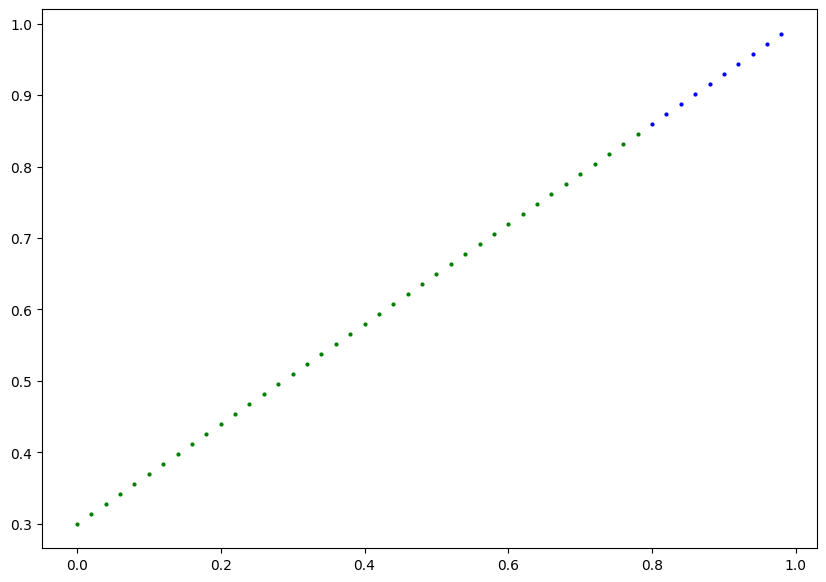

In [93]:
plot_predictions(predictions=y_preds)

## Train model

The whole idea so training is for a model to move from some **unknown** parameters (these may be random) to some **known** parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss functions.


1. **Loss function:** A function to measure how wrong your model's predictions are to ideal outputs, lower is better.

2. **Optimizer** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight&bias) to improve the loss function

And specifically for PyTorch, we need:

* A training loop 
* A testing loop

In [95]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [97]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [100]:
# Setup a loss function

loss_fn = nn.L1Loss()

# Setup an optimizer

optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.001)

## Building a training loop and testing loop

A couple of things we need in a training loop:

1. Loop through the data
2. Forward pass (this involves data moving through our model's)
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward
6. Optimizer step

In [102]:
# An epoch is one loop through the data

epochs = 10

# step 1:
for epoch in range(epochs):
    model_0.train()  # train mode sets all paramets that require all gradient
    
    # 2. Forward pass
    y_pred = model_0(X_train)

    # 3. Calculate the loss
    loss = loss_fn(y_pred, Y_train)
    
    # 4. Optimizer zero grad
    optimizer.zero_grad()
    
    #5. Backpropagation
    loss.backward()
    
    #6. Optimizer
    optimizer.step()
    
    model_0.eval()  # truns off gradient tracking

C:\Users\Mohan krishnan\anaconda3\envs\Entropy\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (50) must match the size of tensor b (40) at non-singleton dimension 0